Le module eurostat est une bibliothèque Python conçue pour interagir avec les bases de données publiques d'Eurostat, qui est l'organisme statistique de l'Union européenne. Il permet aux utilisateurs de rechercher, télécharger et manipuler facilement des ensembles de données provenant directement du portail Eurostat sans avoir à naviguer manuellement sur le site.

In [29]:
!pip install eurostat

In [31]:
import numpy as np
import pandas as pd
import eurostat

## 1.	Années de vie en bonne santé : ABDESSAMAD

#	Années de vie en bonne santé par sexe (à partir de 2004) (hlth_hlye)

Transformation des données pour les données de Api Années de vie en bonne santé par sexe

Années de vie en bonne santé par sexe  : Données sur la durée de vie en bonne santé, différenciées par sexe:

In [32]:
df_hlth_hlye = eurostat.get_data_df('hlth_hlye')
df_hlth_hlye.head()

,freq,unit,sex,indic_he,geo\TIME_PERIOD,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,PC,F,HLY_PC_0,AT,73.5,72.7,73.7,73.9,71.9,...,71.8,68.8,69.4,67.9,67.7,67.7,68.8,70.9,73.2,73.3
1,A,PC,F,HLY_PC_0,BE,71.3,76.1,76.8,77.4,77.6,...,76.6,75.9,76.7,75.8,76.2,75.9,74.5,77.1,76.4,75.5
2,A,PC,F,HLY_PC_0,BG,NaN,NaN,94.2,96.4,85.4,...,84.7,84.7,83.1,86.0,84.4,86.1,86.8,87.4,86.7,88.5
3,A,PC,F,HLY_PC_0,CH,NaN,NaN,NaN,75.4,76.3,...,68.7,66.4,67.9,67.4,69.4,69.4,69.9,71.4,69.1,66.3
4,A,PC,F,HLY_PC_0,CY,NaN,72.0,77.2,76.5,77.8,...,76.5,78.4,75.8,81.1,78.1,73.6,74.6,74.8,80.1,79.5


In [33]:
# Afficher tous les indicateurs disponibles dans la colonne 'indic_de'
indicators_hlth_hlye = df_hlth_hlye['indic_he'].unique()

# Afficher les indicateurs
print(indicators_hlth_hlye)

['HLY_PC_0' 'HLY_PC_50' 'HLY_PC_65' 'HLY_0' 'HLY_50' 'HLY_65' 'LE_0'
 'LE_50' 'LE_65']


HLY_PC_0, HLY_PC_50, HLY_PC_65 : Années de vie en bonne santé (Healthy Life Years) exprimées en pourcentage, à des âges spécifiques :




*   HLY_PC_0 : À la naissance.
*   HLY_PC_50 : À 50 ans.
*   HLY_PC_65 : À 65 ans.










HLY_0, HLY_50, HLY_65 : Années de vie en bonne santé en nombre absolu :



*   HLY_0 : À la naissance.
*   HLY_50 : À 50 ans.
*   HLY_65 : À 65 ans.







LE_0, LE_50, LE_65 : Espérance de vie totale (Life Expectancy) en années :

* LE_0 : À la naissance.

* LE_50 : À 50 ans.

* LE_65 : À 65 ans.


In [34]:
# Obtenir les catégories uniques triées
sorted_SEX_categories = sorted(df_hlth_hlye['sex'].unique())
print("Catégories uniques d'âges triées :", sorted_SEX_categories)


# Obtenir les catégories uniques triées
sorted_unit_categories = sorted(df_hlth_hlye['unit'].unique())
print("Catégories uniques d'unit triées :", sorted_unit_categories)

Catégories uniques d'âges triées : ['F', 'M', 'T']
Catégories uniques d'unit triées : ['PC', 'YR']




* Garder uniquement les données présentées par yr (year) : Cela signifie que l'on doit filtrer les données pour ne conserver que celles où la colonne correspondant à l'année (souvent appelée yr ou year) est pertinente.

* Afficher une vue totale : Il s'agit de sélectionner et de présenter uniquement les données globales, par exemple pour la catégorie sex == 'total' et potentiellement unit == 'years'.

In [35]:
# Vérifier si la colonne 'sex' existe dans le DataFrame
if 'sex' in df_hlth_hlye.columns:
    # Filtrer les lignes où la colonne 'sex' contient "Total"
    df_hlth_hlye = df_hlth_hlye[df_hlth_hlye['sex'].str.contains("T", case=False, na=False)]
else:
    print("La colonne 'sex' n'existe pas dans le DataFrame.")

# Vérifier si la colonne 'sex' existe dans le DataFrame
if 'unit' in df_hlth_hlye.columns:
    # Filtrer les lignes où la colonne 'unit' contient "Total"
    df_hlth_hlye = df_hlth_hlye[df_hlth_hlye['unit'].str.contains("YR", case=False, na=False)]
else:
    print("La colonne 'unit' n'existe pas dans le DataFrame.")

In [36]:
df_hlth_hlye

,freq,unit,sex,indic_he,geo\TIME_PERIOD,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
693,A,YR,T,HLY_0,AT,59.3,58.8,59.9,60.1,59.2,...,59.9,57.7,58.0,57.0,57.1,56.9,57.3,58.7,61.8,60.9
694,A,YR,T,HLY_0,BE,58.7,62.4,63.2,63.7,63.7,...,63.9,64.1,64.2,63.7,63.7,63.4,62.4,63.8,64.6,63.7
695,A,YR,T,HLY_0,BG,NaN,NaN,69.0,70.4,63.9,...,64.5,64.0,63.2,65.7,64.5,65.8,66.3,65.6,63.3,66.7
696,A,YR,T,HLY_0,CH,NaN,NaN,NaN,64.5,65.2,...,60.0,58.6,59.4,59.4,60.6,60.5,60.6,61.5,61.4,59.1
697,A,YR,T,HLY_0,CY,NaN,59.0,63.7,63.0,64.2,...,64.7,66.0,63.3,68.2,65.2,62.2,62.5,62.9,65.7,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,A,YR,T,LE_65,RO,14.4,14.6,15.1,15.5,16.1,...,16.6,16.6,16.4,16.7,16.6,16.7,16.9,15.7,14.6,16.3
887,A,YR,T,LE_65,SE,19.2,19.2,19.4,19.5,19.6,...,20.1,20.3,20.2,20.4,20.4,20.4,20.9,20.2,20.9,20.8
888,A,YR,T,LE_65,SI,17.6,17.5,18.3,18.3,18.8,...,19.5,19.9,19.7,20.0,19.8,20.0,20.1,18.9,19.3,19.7
889,A,YR,T,LE_65,SK,15.5,15.5,15.6,15.8,16.1,...,17.0,17.4,17.2,17.5,17.4,17.6,17.9,17.1,15.4,17.1


Ce processus permet de garantir que les données de l'année 2019 soient aussi complètes que possible en utilisant des informations disponibles pour les années proches (2018 et 2020). Cela renforce la cohérence et réduit l'impact des données manquantes dans l'analyse.

In [44]:
# Remplacer les valeurs NaN dans 2019 par 2018 ou 2020
df_hlth_hlye['2019'] = df_hlth_hlye['2019'].fillna(df_hlth_hlye['2018']).fillna(df_hlth_hlye['2020'])
print("Nombre de NaN dans la colonne 2019 est :", df_hlth_hlye['2019'] .isna().sum())  # Nombre de NaN dans la colonne '2019'

Nombre de NaN dans la colonne 2019 est : 0


Pour analyser ces indicateurs par pays, nous avons pivoté le DataFrame initial en réorganisant les données pour que :

* Les pays (geo\TIME_PERIOD) soient les colonnes "individus".

* Les indicateurs (HLY_0, HLY_50, HLY_65, LE_0, LE_50, LE_65) deviennent les lignes.

Cette structure permet de comparer directement les performances des pays pour chaque indicateur en 2019.

In [45]:
# Pivoter le DataFrame pour que les indicateurs soient en lignes et les pays en colonnes
df_pivot= df_hlth_hlye.pivot_table(index='geo\TIME_PERIOD', columns='indic_he', values='2019', aggfunc='first')

# Afficher le DataFrame pivoté
df_pivot.head()

indic_he,HLY_0,HLY_50,HLY_65,LE_0,LE_50,LE_65
geo\TIME_PERIOD,,,,,,
AT,57.3,15.9,7.7,82.0,33.5,20.3
BE,62.4,19.4,10.6,82.1,33.6,20.6
BG,66.3,20.0,9.9,75.1,27.8,16.3
CH,60.6,19.9,10.9,84.0,35.2,21.7
CY,62.5,17.2,7.6,82.3,33.6,20.3


In [48]:
# Réinitialiser l'index
df_pivot_reset = df_pivot.reset_index()

# Afficher les premières lignes du DataFrame
df_pivot_reset.head()


indic_he,geo\TIME_PERIOD,HLY_0,HLY_50,HLY_65,LE_0,LE_50,LE_65
0,AT,57.3,15.9,7.7,82.0,33.5,20.3
1,BE,62.4,19.4,10.6,82.1,33.6,20.6
2,BG,66.3,20.0,9.9,75.1,27.8,16.3
3,CH,60.6,19.9,10.9,84.0,35.2,21.7
4,CY,62.5,17.2,7.6,82.3,33.6,20.3


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing country mapping dictionary
country_mapping = {
    'AT': 'Autriche', 'BE': 'Belgique', 'BG': 'Bulgarie', 'CY': 'Chypre', 'CZ': 'République tchèque',
    'DE': 'Allemagne', 'DK': 'Danemark', 'EE': 'Estonie', 'ES': 'Espagne', 'FI': 'Finlande',
    'FR': 'France', 'GR': 'Grèce', 'HR': 'Croatie', 'HU': 'Hongrie', 'IE': 'Irlande', 'IT': 'Italie',
    'LT': 'Lituanie', 'LU': 'Luxembourg', 'LV': 'Lettonie', 'MT': 'Malte', 'NL': 'Pays-Bas',
    'PL': 'Pologne', 'PT': 'Portugal', 'RO': 'Roumanie', 'SE': 'Suède', 'SI': 'Slovénie',
    'SK': 'Slovaquie', 'NO': 'Norvège', 'IS': 'Islande', 'RS': 'Serbie', 'TR': 'Türkiye', 'CH': 'Suisse'
}

# Assuming df_pivot_reset is your DataFrame
df_pivot_reset['geo\\TIME_PERIOD'] = df_pivot_reset['geo\\TIME_PERIOD'].replace(country_mapping)

# Display the first few rows of the DataFrame
df_pivot_reset.head()


indic_he,geo\TIME_PERIOD,HLY_0,HLY_50,HLY_65,LE_0,LE_50,LE_65
0,Autriche,57.3,15.9,7.7,82.0,33.5,20.3
1,Belgique,62.4,19.4,10.6,82.1,33.6,20.6
2,Bulgarie,66.3,20.0,9.9,75.1,27.8,16.3
3,Suisse,60.6,19.9,10.9,84.0,35.2,21.7
4,Chypre,62.5,17.2,7.6,82.3,33.6,20.3


# Importance du boxplot dans le nettoyage des données

* Détection des valeurs aberrantes :Les points isolés en dehors des moustaches indiquent des outliers.

* Analyse de la dispersion :Il montre la variabilité des données pour chaque indicateur.

* Vérification de la qualité des données : aide à s’assurer que les données sont réalistes et homogènes.

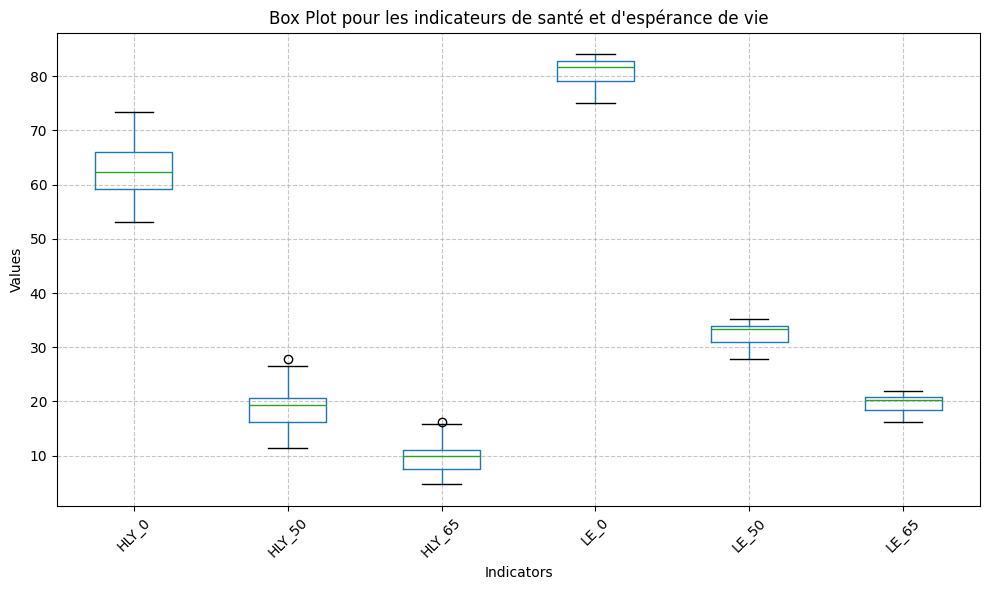

In [50]:
plt.figure(figsize=(10, 6))
df_pivot.boxplot(column=["HLY_0", "HLY_50", "HLY_65", "LE_0", "LE_50", "LE_65"])
plt.title("Box Plot pour les indicateurs de santé et d'espérance de vie")
plt.ylabel("Values")
plt.xlabel("Indicators")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Interprétation du graphique

Le boxplot présente la distribution des indicateurs suivants pour différents pays :

HLY_0, HLY_50, HLY_65 : Années de vie en bonne santé.

* HLY_0 : La médiane est élevée, avec une variabilité relativement faible.

* HLY_50 et HLY_65 : Les médianes sont plus basses, et il y a des valeurs aberrantes (outliers), reflétant une dispersion plus importante.

LE_0, LE_50, LE_65 : Espérance de vie totale.

* LE_0 : La médiane est élevée (autour de 80 ans), avec une faible dispersion.
* LE_50 et LE_65 : Les médianes diminuent logiquement avec l’âge, et la variabilité reste faible.


* LE_0 est une mesure globale dès la naissance, intégrant les décès à tous les âges.

* LE_50 et LE_65 sont conditionnés par le fait d'avoir atteint un âge donné (50 ans ou 65 ans), ce qui les rend plus représentatifs pour les populations âgées.

* Plus l'âge est avancé, plus les espérances de vie restantes (LE_50 ou LE_65) sont courtes, car elles ne tiennent compte que des survivants.

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [52]:
# Sélectionner les colonnes numériques
X = df_pivot_reset.select_dtypes(include=['number'])

# Afficher les données avec les noms de colonnes
print(X.head())

# Convertir en array si nécessaire tout en conservant les noms des colonnes
X_values = X.values
column_names = X.columns.tolist()

indic_he  HLY_0  HLY_50  HLY_65  LE_0  LE_50  LE_65
0          57.3    15.9     7.7  82.0   33.5   20.3
1          62.4    19.4    10.6  82.1   33.6   20.6
2          66.3    20.0     9.9  75.1   27.8   16.3
3          60.6    19.9    10.9  84.0   35.2   21.7
4          62.5    17.2     7.6  82.3   33.6   20.3


## ACP non normalisée peut être appliquée pour
---



1 Réduire la complexité du jeu de données en identifiant les axes principaux qui expliquent la majorité de la variance.

2 Faciliter l'interprétation des relations entre les indicateurs de santé et d'espérance de vie.

3 Visualiser les données dans un espace réduit

# Rôle de la matrice de covariance
* La matrice de covariance est une étape clé dans l'ACP. Elle mesure les relations linéaires entre les différentes variables :
* Les valeurs sur la diagonale représentent la variance de chaque variable.
Les valeurs hors diagonale (les covariances) indiquent dans quelle mesure deux variables varient conjointement. Une covariance positive indique une relation directe, tandis qu'une covariance négative reflète une relation inverse.

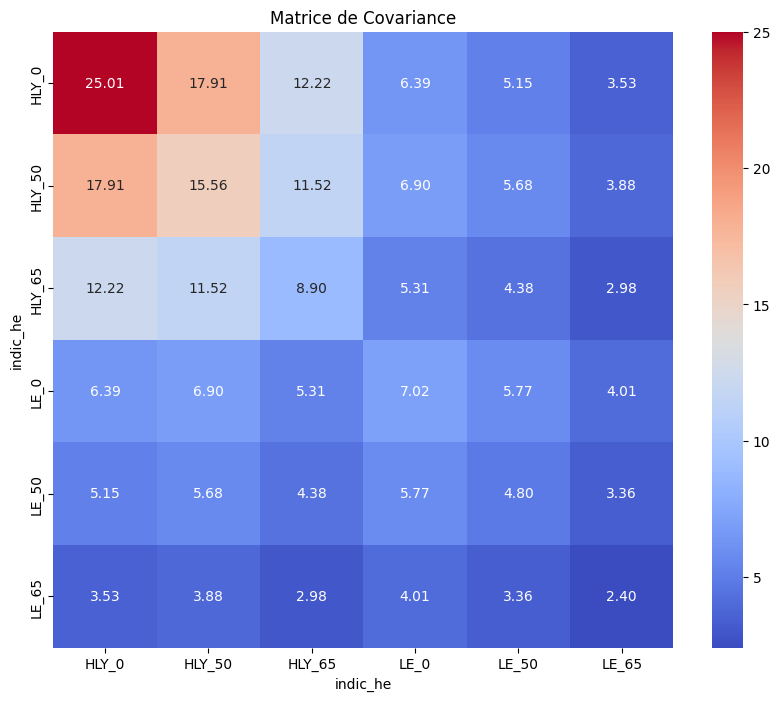

In [53]:
import seaborn as sns

# Calcul de la matrice de covariance
cov_matrix = pd.DataFrame(X).cov()

# Visualiser la matrice de covariance
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Covariance')
plt.show()


* La matrice de covariance révèle des relations importantes entre les indicateurs de santé et d'espérance de vie. Les variables HLY_0, HLY_50, et HLY_65 présentent une forte interdépendance, tandis que l'espérance de vie (LE) montre des relations plus modérées. Ces résultats justifient l'application d'une ACP pour réduire la dimensionnalité et mieux comprendre les dynamiques entre ces indicateurs dans le cadre des pays étudiés.

* Le centrage des données dans une ACP non normalisée consiste à soustraire la moyenne de chaque variable à ses valeurs, ce qui permet de recentrer les données autour de zéro.





In [54]:
# Centrage des données (soustraction de la moyenne)
X_centered = X - np.mean(X, axis=0)
# Afficher les premières lignes
print("Données centrées :")
X_centered.head()


Données centrées :


indic_he,HLY_0,HLY_50,HLY_65,LE_0,LE_50,LE_65
0,-5.330303,-3.087879,-1.966667,1.184848,0.987879,0.515152
1,-0.230303,0.412121,0.933333,1.284848,1.087879,0.815152
2,3.669697,1.012121,0.233333,-5.715152,-4.712121,-3.484848
3,-2.030303,0.912121,1.233333,3.184848,2.687879,1.915152
4,-0.130303,-1.787879,-2.066667,1.484848,1.087879,0.515152


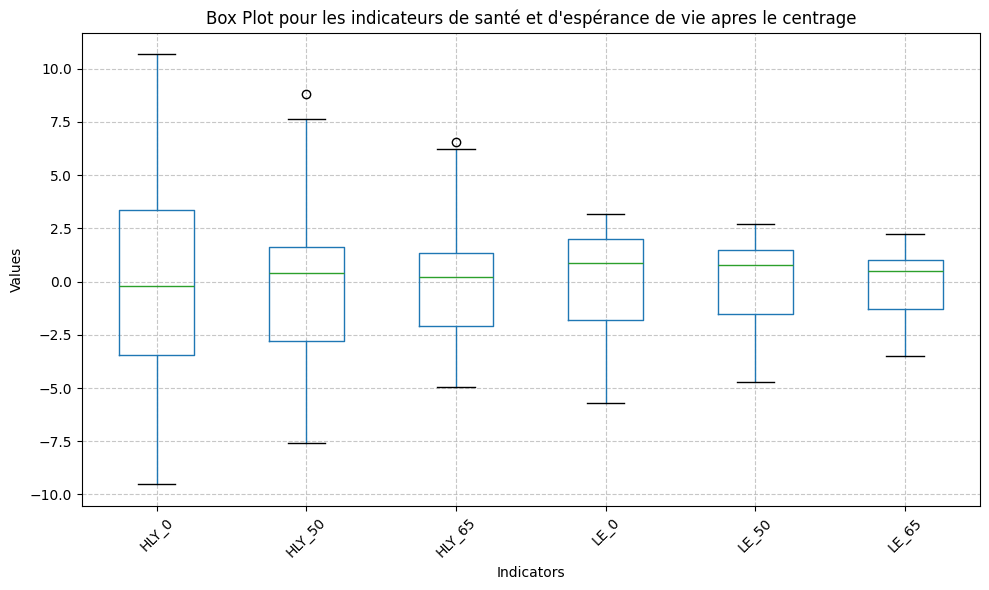

In [55]:
plt.figure(figsize=(10, 6))
X_centered.boxplot(column=["HLY_0", "HLY_50", "HLY_65", "LE_0", "LE_50", "LE_65"])
plt.title("Box Plot pour les indicateurs de santé et d'espérance de vie apres le centrage")
plt.ylabel("Values")
plt.xlabel("Indicators")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [56]:
# Application de PCA
pca = PCA(n_components=2)  # Réduction en 2 composantes principales
X_pca = pca.fit_transform(X_centered)

# Créer un DataFrame pour les nouvelles composantes
df_pca = pd.DataFrame(data=X_pca, columns=['Composante_1', 'Composante_2'])

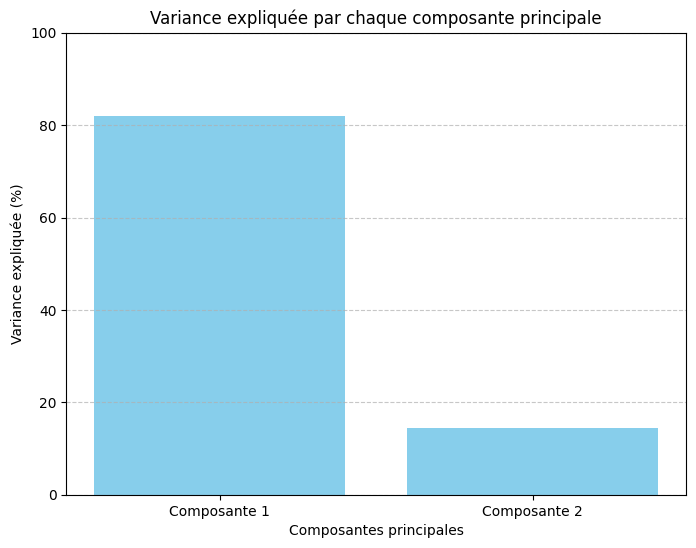

In [57]:
# Variance expliquée par chaque composante
variance_expliquee = pca.explained_variance_ratio_

# Diagramme en barres
plt.figure(figsize=(8, 6))
composantes = [f'Composante {i+1}' for i in range(len(variance_expliquee))]
plt.bar(composantes, variance_expliquee * 100, color='skyblue')

# Ajouter des étiquettes et un titre
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée (%)')
plt.title('Variance expliquée par chaque composante principale')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

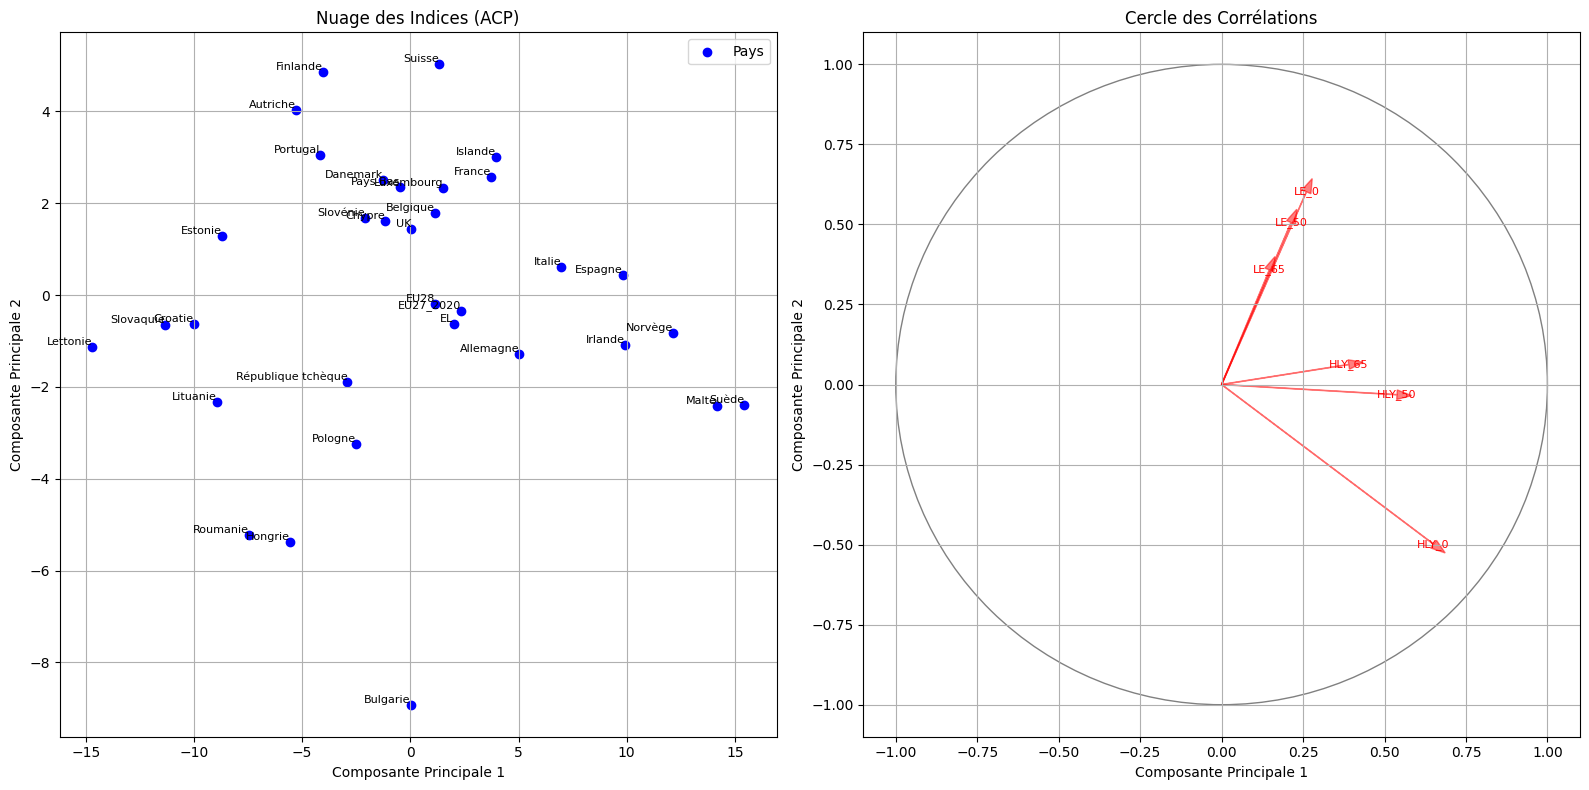

In [58]:
# Supposons que `df` soit votre DataFrame contenant les données avant centrage
feature_names = X.columns.tolist()  # Récupérer les noms des colonnes (variables)

# Cercle de corrélation
def plot_correlation_circle(components, feature_names, ax, labels=True):
    circle = plt.Circle((0, 0), 1, color='gray', fill=False)
    ax.add_artist(circle)
    for i, (x, y) in enumerate(components.T):  # Transpose pour accéder aux colonnes
        if labels:
            ax.text(x, y, feature_names[i], fontsize=8, ha='center', va='center', color='red')
        ax.arrow(0, 0, x, y, color='red', alpha=0.5, head_width=0.03)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel('Composante Principale 1')
    ax.set_ylabel('Composante Principale 2')
    ax.set_title('Cercle des Corrélations')
    ax.grid()

# Résultats de l'ACP
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Nuage des individus (avec noms des pays)
ax1.scatter(df_pca['Composante_1'], df_pca['Composante_2'], color='blue', label='Pays')
for i, country in enumerate(df_pivot_reset['geo\\TIME_PERIOD']):
    ax1.text(df_pca['Composante_1'][i], df_pca['Composante_2'][i], country, fontsize=8, ha='right', va='bottom')
ax1.set_title('Nuage des Indices (ACP)')
ax1.set_xlabel('Composante Principale 1')
ax1.set_ylabel('Composante Principale 2')
ax1.grid()
ax1.legend()

# Cercle des corrélations
components = pca.components_[:2]  # Prenez les deux premières composantes
plot_correlation_circle(components, feature_names, ax2)

plt.tight_layout()
plt.show()


# Classification

## Problématique

L'objectif de cette étude est de regrouper les pays en fonction de espérance de vie  et Années de vie en bonne santé.
Cela inclut l'analyse des indicateurs suivants :
- **Années de vie en bonne santé** (HLY) :
  - HLY_0 : À la naissance
  - HLY_50 : À 50 ans
  - HLY_65 : À 65 ans
- **Espérance de vie totale** (LE) :
  - LE_0 : À la naissance
  - LE_50 : À 50 ans
  - LE_65 : À 65 ans
  
Les pays seront regroupés à l'aide d'une méthode de classification comme le K-means, en vue d'identifier des groupes homogènes, facilitant l'interprétation des données et l'élaboration de stratégies adaptées.

## Objectif

L'objectif est d'utiliser une méthode de classification (comme le K-means) pour :
- Regrouper les pays ayant des caractéristiques similaires en clusters homogènes.
- Faciliter l'interprétation des données en identifiant des tendances ou des patterns.
- Proposer des recommandations ou des stratégies adaptées pour chaque groupe de pays.



In [59]:
from sklearn.cluster import KMeans
import numpy as np

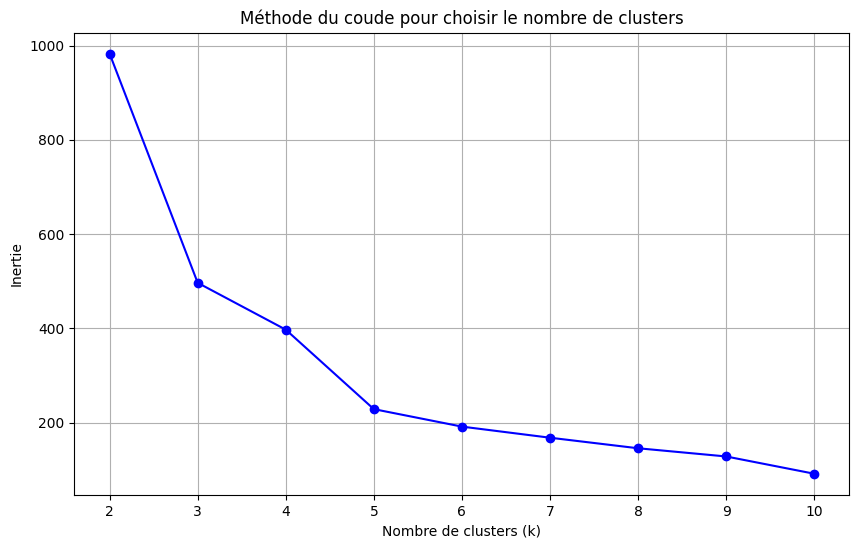

In [60]:
# Définir les nombres de clusters (k) à tester
k_values = range(2, 11)

# Calculer le coût (inertie) pour chaque k
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca[['Composante_1', 'Composante_2']])
    inertias.append(kmeans.inertia_)

# Graphe du coût en fonction de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o', linestyle='-', color='blue')
plt.title('Méthode du coude pour choisir le nombre de clusters')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.grid()
plt.show()


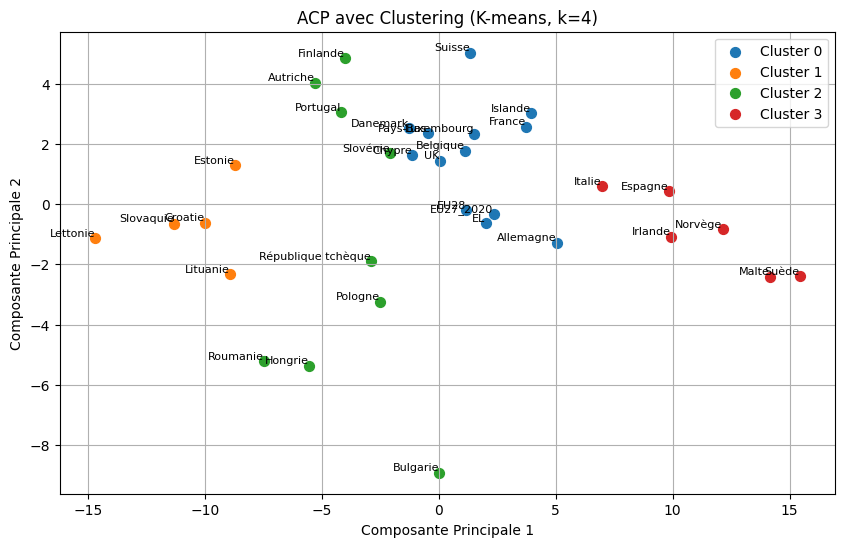

In [61]:
# Appliquer K-means avec le nombre optimal de clusters (par exemple, k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca[['Composante_1', 'Composante_2']])

# Visualiser les clusters dans le plan ACP
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['Composante_1'], cluster_data['Composante_2'], label=f'Cluster {cluster}', s=50)

# Ajouter les noms des pays
for i, country in enumerate(df_pivot_reset['geo\\TIME_PERIOD']):
    plt.text(df_pca['Composante_1'][i], df_pca['Composante_2'][i], country, fontsize=8, ha='right', va='bottom')

# Configuration du graphique
plt.title(f'ACP avec Clustering (K-means, k={optimal_k})')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend()
plt.grid()
plt.show()


## l'Analyse Factorielle Discriminante (AFD) :

* AFD après les résultats de classification a pour objectif principal d'interpréter et de visualiser les clusters formés.


* En représentant les clusters dans l'espace AFD, il devient plus facile de comprendre comment les pays se répartissent en fonction des indicateurs étudiés.
Les axes discriminants obtenus par l'AFD montrent les dimensions les plus pertinentes pour distinguer les groupes homogènes.

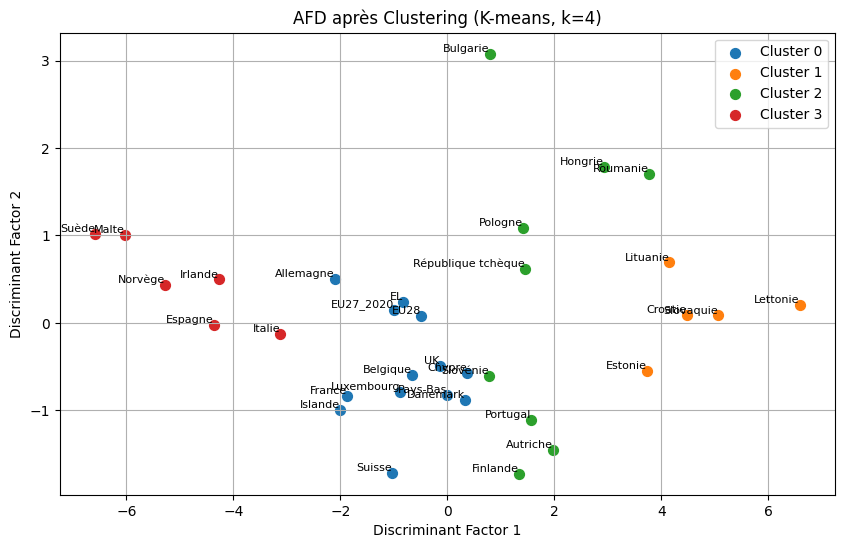

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Séparation des données et des clusters
X = df_pca[['Composante_1', 'Composante_2']]
y = df_pca['Cluster']

# Application de l'AFD
lda = LDA(n_components=2)  # AFD avec 2 dimensions principales
X_lda = lda.fit_transform(X, y)

# Ajout des résultats AFD au DataFrame
df_pca['AFD_1'] = X_lda[:, 0]
if X_lda.shape[1] > 1:  # Si plus d'une composante
    df_pca['AFD_2'] = X_lda[:, 1]

# Visualisation des clusters dans l'espace AFD
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['AFD_1'], cluster_data['AFD_2'], label=f'Cluster {cluster}', s=50)

# Ajouter les noms des pays
for i, country in enumerate(df_pivot_reset['geo\\TIME_PERIOD']):
    plt.text(df_pca['AFD_1'][i], df_pca['AFD_2'][i], country, fontsize=8, ha='right', va='bottom')

# Configuration du graphique
plt.title(f'AFD après Clustering (K-means, k={optimal_k})')
plt.xlabel('Discriminant Factor 1')
plt.ylabel('Discriminant Factor 2')
plt.legend()
plt.grid()
plt.show()


# Espérance de vie en bonne santé basée sur la santé perçue par soi-même (hlth_silc_17)

In [63]:
df_hlth_silc = eurostat.get_data_df('hlth_silc_17')
df_hlth_silc

,freq,unit,indic_he,sex,geo\TIME_PERIOD,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,YR,HE_50,F,AT,27.1,27.0,27.8,27.8,28.4,...,28.4,28.7,28.9,29.6,29.3,29.7,29.8,29.8,29.8,29.4
1,A,YR,HE_50,F,BE,27.6,27.9,28.2,28.5,28.6,...,28.7,29.2,28.3,29.1,29.6,29.4,30.0,29.5,30.2,29.8
2,A,YR,HE_50,F,BG,NaN,NaN,17.5,18.8,20.4,...,23.5,22.9,23.1,23.9,24.0,24.5,25.2,24.3,23.2,25.7
3,A,YR,HE_50,F,CH,NaN,NaN,NaN,32.8,33.9,...,33.6,33.7,33.6,34.4,34.2,34.4,34.7,34.3,34.7,34.7
4,A,YR,HE_50,F,CY,NaN,22.5,23.0,23.4,25.4,...,27.3,28.9,29.1,30.9,30.5,29.8,29.6,29.3,29.3,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,A,YR,HE_BIRTH,T,RO,NaN,NaN,NaN,66.7,67.7,...,69.0,69.2,69.8,70.9,70.8,70.9,71.1,70.2,69.1,71.2
299,A,YR,HE_BIRTH,T,SE,75.5,76.5,76.9,77.4,77.3,...,78.8,78.9,79.0,78.3,78.3,78.4,79.3,78.5,78.4,77.3
300,A,YR,HE_BIRTH,T,SI,NaN,66.2,67.1,67.8,68.7,...,72.0,72.5,72.1,73.6,73.8,74.0,74.2,73.7,74.8,76.2
301,A,YR,HE_BIRTH,T,SK,NaN,61.9,62.0,62.5,64.1,...,67.5,67.6,67.5,68.3,68.9,68.7,68.6,68.2,66.8,68.6


In [64]:
# Afficher tous les indicateurs disponibles dans la colonne 'indic_de'
indicators_hlth_silc = df_hlth_silc['indic_he'].unique()

# Afficher les indicateurs
print(indicators_hlth_silc)

['HE_50' 'HE_65' 'HE_BIRTH']


In [65]:
# Calcul des valeurs nulles dans la colonne 2018
nb_valeurs_nulles =df_hlth_silc['2019'].isnull().sum()

# Affichage du résultat
print(f"Nombre de valeurs nulles dans la colonne 2023 : {nb_valeurs_nulles}")

Nombre de valeurs nulles dans la colonne 2023 : 33


In [66]:
# Remplacer les valeurs NaN dans 2019 par 2018 ou 2020
df_hlth_silc['2019'] = df_hlth_silc['2019'].fillna(df_hlth_silc['2018']).fillna(df_hlth_silc['2020'])

In [67]:
# Calcul des valeurs nulles dans la colonne 2018
nb_valeurs_nulles =df_hlth_silc['2019'].isnull().sum()

# Affichage du résultat
print(f"Nombre de valeurs nulles dans la colonne 2023 : {nb_valeurs_nulles}")

Nombre de valeurs nulles dans la colonne 2023 : 6


In [68]:
# Pivoter le DataFrame pour que les indicateurs soient en lignes et les pays en colonnes
df_pivot_2 = df_hlth_silc.pivot_table(index='geo\TIME_PERIOD', columns='indic_he', values='2019', aggfunc='first')

# Afficher le DataFrame pivoté
df_pivot_2.head()

indic_he,HE_50,HE_65,HE_BIRTH
geo\TIME_PERIOD,,,
AT,29.8,17.2,77.5
BE,30.0,18.3,77.1
BG,25.2,13.3,72.9
CH,34.7,21.7,83.0
CY,29.6,16.5,78.4


In [69]:
# Calculer le nombre total de valeurs nulles dans tout le DataFrame
total_null_values = df_pivot_2.isnull().sum().sum()
print("Total des valeurs nulles :", total_null_values)

Total des valeurs nulles : 0


In [70]:
len(df_pivot_2)

33

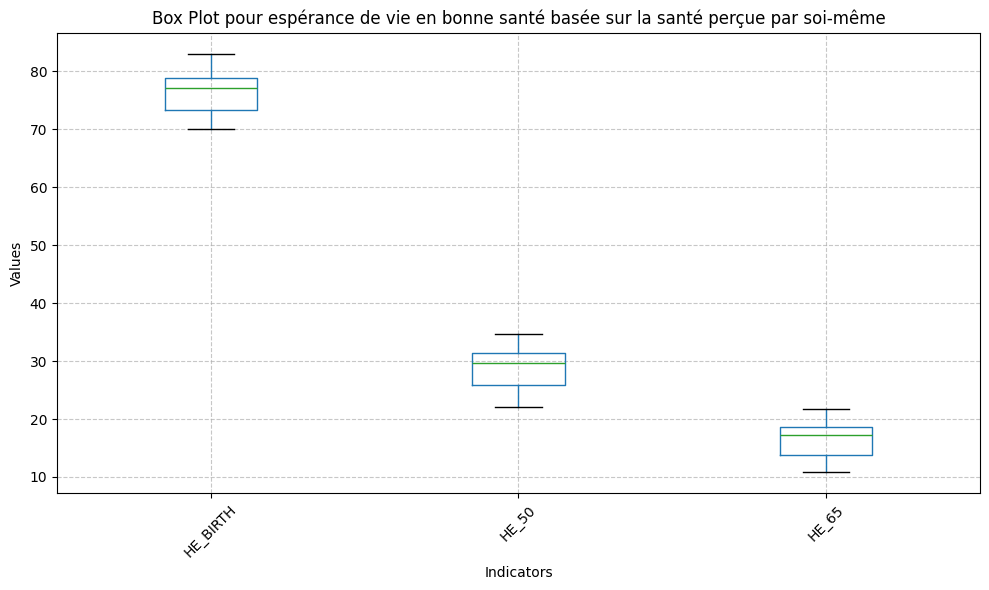

In [71]:
plt.figure(figsize=(10, 6))
df_pivot_2.boxplot(column=['HE_BIRTH','HE_50' ,'HE_65' ])
plt.title("Box Plot pour espérance de vie en bonne santé basée sur la santé perçue par soi-même")
plt.ylabel("Values")
plt.xlabel("Indicators")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Absence du travail en raison de problèmes de santé personnels par sexe, âge et niveau d'éducation atteint (hlth_ehis_aw1e)

In [72]:
df_hlth_ehis_aw1e= eurostat.get_data_df('hlth_ehis_aw1e')
df_hlth_ehis_aw1e.head(100)

,freq,unit,isced11,sex,age,geo\TIME_PERIOD,2014,2019
0,A,PC,ED0-2,F,TOTAL,AT,49.1,50.6
1,A,PC,ED0-2,F,TOTAL,BE,37.0,40.1
2,A,PC,ED0-2,F,TOTAL,BG,11.6,19.6
3,A,PC,ED0-2,F,TOTAL,CY,8.9,13.6
4,A,PC,ED0-2,F,TOTAL,CZ,30.3,27.3
...,...,...,...,...,...,...,...,...
95,A,PC,ED0-2,F,Y15-29,RO,2.7,7.8
96,A,PC,ED0-2,F,Y15-29,RS,NaN,NaN
97,A,PC,ED0-2,F,Y15-29,SE,45.0,43.0
98,A,PC,ED0-2,F,Y15-29,SI,NaN,NaN


In [73]:
# Obtenir les catégories uniques triées
sorted_age_categories = sorted(df_hlth_ehis_aw1e['age'].unique())
print("Catégories uniques d'âges triées :", sorted_age_categories)


Catégories uniques d'âges triées : ['TOTAL', 'Y15-24', 'Y15-29', 'Y15-44', 'Y15-64', 'Y25-34', 'Y25-64', 'Y35-44', 'Y45-54', 'Y45-64', 'Y55-64', 'Y65-74', 'Y_GE65', 'Y_GE75']


In [74]:
# Vérifier si la colonne 'age' existe dans le DataFrame
if 'age' in df_hlth_ehis_aw1e.columns:
    # Filtrer les lignes où la colonne 'age' ne contient pas "Total"
    df_hlth_ehis_aw1e = df_hlth_ehis_aw1e[~df_hlth_ehis_aw1e['age'].str.contains("Total", case=False, na=False)]
    print(df_hlth_ehis_aw1e)
else:
    print("La colonne 'age' n'existe pas dans le DataFrame.")

     freq unit isced11 sex     age geo\TIME_PERIOD  2014  2019
34      A   PC   ED0-2   F  Y15-24              AT  56.5  66.1
35      A   PC   ED0-2   F  Y15-24              BE   NaN   NaN
36      A   PC   ED0-2   F  Y15-24              BG   NaN   NaN
37      A   PC   ED0-2   F  Y15-24              CY   NaN   NaN
38      A   PC   ED0-2   F  Y15-24              CZ   NaN   NaN
...   ...  ...     ...  ..     ...             ...   ...   ...
5299    A   PC   TOTAL   T  Y_GE75              SE   NaN  12.0
5300    A   PC   TOTAL   T  Y_GE75              SI   NaN   NaN
5301    A   PC   TOTAL   T  Y_GE75              SK   0.0   NaN
5302    A   PC   TOTAL   T  Y_GE75              TR   7.2   7.2
5303    A   PC   TOTAL   T  Y_GE75              UK  16.8   NaN

[4896 rows x 8 columns]


In [75]:
# Obtenir les catégories uniques triées
sorted_age_categories = sorted(df_hlth_ehis_aw1e['sex'].unique())
print("Catégories uniques d'âges triées :", sorted_age_categories)

# Obtenir les catégories uniques triées
sorted_age_categories = sorted(df_hlth_ehis_aw1e['isced11'].unique())
print("Catégories uniques d'âges triées :", sorted_age_categories)

Catégories uniques d'âges triées : ['F', 'M', 'T']
Catégories uniques d'âges triées : ['ED0-2', 'ED3_4', 'ED5-8', 'TOTAL']


In [76]:
# Vérifier si la colonne 'isced11' existe dans le DataFrame
if 'isced11' in df_hlth_ehis_aw1e.columns:
    # Filtrer les lignes où la colonne 'sex' contient "Total"
    df_hlth_ehis_aw1e = df_hlth_ehis_aw1e[~df_hlth_ehis_aw1e['sex'].str.contains("T", case=False, na=False)]
else:
    print("La colonne 'sex' n'existe pas dans le DataFrame.")


# Vérifier si la colonne 'sex' existe dans le DataFrame
if 'isced11' in df_hlth_ehis_aw1e.columns:
    # Filtrer les lignes où la colonne 'isced11' contient "Total"
    df_hlth_ehis_aw1e = df_hlth_ehis_aw1e[df_hlth_ehis_aw1e['isced11'].str.contains("Total", case=False, na=False)]
    print(df_hlth_ehis_aw1e)
else:
    print("La colonne 'isced11' n'existe pas dans le DataFrame.")

     freq unit isced11 sex     age geo\TIME_PERIOD  2014  2019
4012    A   PC   TOTAL   F  Y15-24              AT  55.1  67.4
4013    A   PC   TOTAL   F  Y15-24              BE  36.5  33.4
4014    A   PC   TOTAL   F  Y15-24              BG  12.3   8.1
4015    A   PC   TOTAL   F  Y15-24              CY  11.5  15.3
4016    A   PC   TOTAL   F  Y15-24              CZ  23.1  19.2
...   ...  ...     ...  ..     ...             ...   ...   ...
4857    A   PC   TOTAL   M  Y_GE75              SE   NaN  12.3
4858    A   PC   TOTAL   M  Y_GE75              SI   NaN   NaN
4859    A   PC   TOTAL   M  Y_GE75              SK   0.0   NaN
4860    A   PC   TOTAL   M  Y_GE75              TR   7.4   NaN
4861    A   PC   TOTAL   M  Y_GE75              UK  16.8   NaN

[816 rows x 8 columns]


In [77]:
df_hlth_ehis_aw1e['2019'] = df_hlth_ehis_aw1e['2019'].fillna(df_hlth_ehis_aw1e['2014']).fillna(df_hlth_ehis_aw1e['2014'])
# Calcul des valeurs nulles dans la colonne 2018
nb_valeurs_nulles =df_hlth_ehis_aw1e['2019'].isnull().sum()

# Affichage du résultat
print(f"Nombre de valeurs nulles dans la colonne 2019 : {nb_valeurs_nulles}")

Nombre de valeurs nulles dans la colonne 2019 : 65


In [78]:
df_hlth_ehis_aw1e = df_hlth_ehis_aw1e.dropna(subset=['2019'])

In [79]:
df_hlth_ehis_aw1e = df_hlth_ehis_aw1e.drop(columns=['2014'])

In [80]:
df_hlth_ehis_aw1e.head()

,freq,unit,isced11,sex,age,geo\TIME_PERIOD,2019
4012,A,PC,TOTAL,F,Y15-24,AT,67.4
4013,A,PC,TOTAL,F,Y15-24,BE,33.4
4014,A,PC,TOTAL,F,Y15-24,BG,8.1
4015,A,PC,TOTAL,F,Y15-24,CY,15.3
4016,A,PC,TOTAL,F,Y15-24,CZ,19.2


Le jeu de données porte sur l'absence du travail en raison de problèmes de santé personnels, avec des informations réparties par sexe (F et M), groupe d'âge (par exemple, 'Y15-24', 'Y15-29', 'Y15-44', etc.), et niveau d'éducation atteint. Les données incluent également des informations sur différents pays ou régions (géographiques) dans l'année 2019 Ce jeu de données permet d’analyser les variations de l'absence au travail en fonction du sexe, de l’âge et du niveau d'éducation, offrant ainsi une base pour étudier les disparités et les tendances sur la santé au travail.

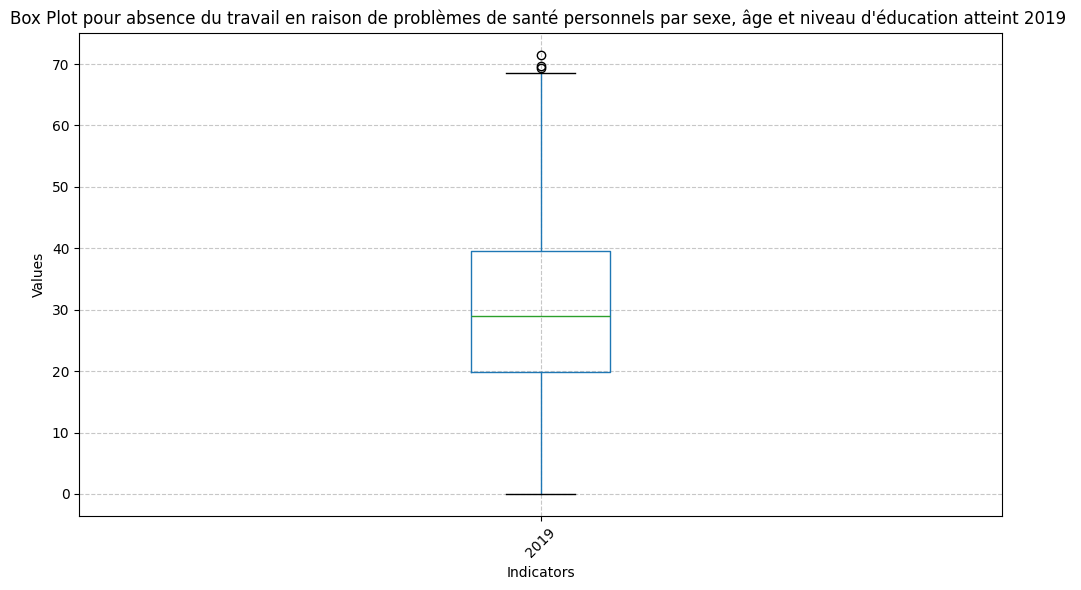

In [81]:
plt.figure(figsize=(10, 6))
df_hlth_ehis_aw1e.boxplot(column=['2019'])
plt.title("Box Plot pour absence du travail en raison de problèmes de santé personnels par sexe, âge et niveau d'éducation atteint 2019 ")
plt.ylabel("Values")
plt.xlabel("Indicators")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Absence du travail en raison de problèmes de santé personnels par sexe, âge et degré d'urbanisation (hlth_ehis_aw1u)

In [82]:
df_hlth_ehis_aw1u= eurostat.get_data_df('hlth_ehis_aw1u')
df_hlth_ehis_aw1u.head(100)

,freq,deg_urb,sex,age,unit,geo\TIME_PERIOD,2014,2019
0,A,DEG1,F,TOTAL,PC,AT,54.1,59.3
1,A,DEG1,F,TOTAL,PC,BE,42.8,45.8
2,A,DEG1,F,TOTAL,PC,BG,20.5,18.7
3,A,DEG1,F,TOTAL,PC,CY,16.7,21.5
4,A,DEG1,F,TOTAL,PC,CZ,23.8,23.2
...,...,...,...,...,...,...,...,...
95,A,DEG1,F,Y15-29,PC,SI,58.8,52.3
96,A,DEG1,F,Y15-29,PC,SK,12.9,25.8
97,A,DEG1,F,Y15-29,PC,TR,0.0,NaN
98,A,DEG1,F,Y15-29,PC,UK,32.8,NaN


In [83]:
# Vérifier si la colonne 'age' existe dans le DataFrame
if 'age' in df_hlth_ehis_aw1u.columns:
    # Filtrer les lignes où la colonne 'age' contient "Total"
    df_hlth_ehis_aw1u = df_hlth_ehis_aw1u[df_hlth_ehis_aw1u['age'].str.contains("TOTAL", case=False, na=False)]
else:
    print("La colonne 'age' n'existe pas dans le DataFrame.")
# Vérifier si la colonne 'age' existe dans le DataFrame
if 'sex' in df_hlth_ehis_aw1u.columns:
    # Filtrer les lignes où la colonne 'sex' contient "Total"
    df_hlth_ehis_aw1u = df_hlth_ehis_aw1u[df_hlth_ehis_aw1u['sex'].str.contains("T", case=False, na=False)]
else:
    print("La colonne 'sex' n'existe pas dans le DataFrame.")


    # Vérifier si la colonne 'age' existe dans le DataFrame
if 'deg_urb' in df_hlth_ehis_aw1u.columns:
    # Filtrer les lignes où la colonne 'deg_urb' contient "Total"
    df_hlth_ehis_aw1u = df_hlth_ehis_aw1u[~df_hlth_ehis_aw1u['deg_urb'].str.contains("TOTAL", case=False, na=False)]
    print(df_hlth_ehis_aw1u)
else:
    print("La colonne 'deg_urb' n'existe pas dans le DataFrame.")


     freq deg_urb sex    age unit geo\TIME_PERIOD  2014  2019
860     A    DEG1   T  TOTAL   PC              AT  50.5  56.1
861     A    DEG1   T  TOTAL   PC              BE  38.4  42.2
862     A    DEG1   T  TOTAL   PC              BG  16.1  16.8
863     A    DEG1   T  TOTAL   PC              CY  16.4  21.0
864     A    DEG1   T  TOTAL   PC              CZ  23.2  20.4
...   ...     ...  ..    ...  ...             ...   ...   ...
3468    A    DEG3   T  TOTAL   PC              SE  44.2  39.2
3469    A    DEG3   T  TOTAL   PC              SI  33.3  35.1
3470    A    DEG3   T  TOTAL   PC              SK  20.8  23.8
3471    A    DEG3   T  TOTAL   PC              TR   0.0   NaN
3472    A    DEG3   T  TOTAL   PC              UK  33.1   NaN

[99 rows x 8 columns]


In [84]:
# Obtenir les catégories uniques triées
sorted_unit_categories = sorted(df_hlth_ehis_aw1u['unit'].unique())
print("Catégories uniques d'unit triées :", sorted_unit_categories)

Catégories uniques d'unit triées : ['PC']


In [85]:
df_hlth_ehis_aw1u['2019'] = df_hlth_ehis_aw1u['2019'].fillna(df_hlth_ehis_aw1u['2014']).fillna(df_hlth_ehis_aw1u['2014'])
# Calcul des valeurs nulles dans la colonne 2018
nb_valeurs_nulles =df_hlth_ehis_aw1u['2019'].isnull().sum()

# Affichage du résultat
print(f"Nombre de valeurs nulles dans la colonne 2019 : {nb_valeurs_nulles}")

Nombre de valeurs nulles dans la colonne 2019 : 0


In [86]:
len(df_hlth_ehis_aw1u)

99

In [87]:
print(df_hlth_ehis_aw1u)

     freq deg_urb sex    age unit geo\TIME_PERIOD  2014  2019
860     A    DEG1   T  TOTAL   PC              AT  50.5  56.1
861     A    DEG1   T  TOTAL   PC              BE  38.4  42.2
862     A    DEG1   T  TOTAL   PC              BG  16.1  16.8
863     A    DEG1   T  TOTAL   PC              CY  16.4  21.0
864     A    DEG1   T  TOTAL   PC              CZ  23.2  20.4
...   ...     ...  ..    ...  ...             ...   ...   ...
3468    A    DEG3   T  TOTAL   PC              SE  44.2  39.2
3469    A    DEG3   T  TOTAL   PC              SI  33.3  35.1
3470    A    DEG3   T  TOTAL   PC              SK  20.8  23.8
3471    A    DEG3   T  TOTAL   PC              TR   0.0   0.0
3472    A    DEG3   T  TOTAL   PC              UK  33.1  33.1

[99 rows x 8 columns]


Objectifs du jeu de données

* Identifier les disparités selon les zones urbaines ou rurales.

* Comparer les taux entre les différents pays.

* Observer l'évolution des absences en 2019.

Soutenir les politiques de santé au travail en ciblant les populations les plus touchées.

Utilisation possible

* Études sur la santé publique et les conditions de travail.

* Comparaison internationale des impacts de la santé sur l'emploi.

* Identification des régions ou pays nécessitant des interventions spécifiques.

#	Absence du travail en raison de problèmes de santé personnels par niveau de handicap (restriction d'activité), sexe et âge (hlth_ehis_aw1d)

In [101]:
df_hlth_ehis_aw1d= eurostat.get_data_df('hlth_ehis_aw1d')
df_hlth_ehis_aw1d.head()

,freq,lev_limit,sex,age,unit,geo\TIME_PERIOD,2014,2019
0,A,MOD,F,TOTAL,PC,AT,62.0,62.7
1,A,MOD,F,TOTAL,PC,BE,69.8,68.1
2,A,MOD,F,TOTAL,PC,BG,37.2,55.5
3,A,MOD,F,TOTAL,PC,CY,27.1,60.1
4,A,MOD,F,TOTAL,PC,CZ,38.5,37.7


In [102]:
# Obtenir les catégories uniques triées
sorted_age_categories = sorted(df_hlth_ehis_aw1d['age'].unique())
print("Catégories uniques d'âges triées :", sorted_age_categories)

# Obtenir les catégories uniques triées
sorted_age_categories = sorted(df_hlth_ehis_aw1d['lev_limit'].unique())
print("Catégories uniques d'lev_limit triées :", sorted_age_categories)

# Obtenir les catégories uniques triées
sorted_age_categories = sorted(df_hlth_ehis_aw1d['unit'].unique())
print("Catégories uniques d'unit triées :", sorted_age_categories)


Catégories uniques d'âges triées : ['TOTAL', 'Y15-24', 'Y15-29', 'Y15-44', 'Y15-64', 'Y25-34', 'Y25-64', 'Y35-44', 'Y45-54', 'Y45-64', 'Y55-64', 'Y65-74', 'Y_GE65', 'Y_GE75']
Catégories uniques d'lev_limit triées : ['MOD', 'NONE', 'SEV', 'SM_SEV']
Catégories uniques d'unit triées : ['PC']


In [103]:
# Vérifier si la colonne 'age' existe dans le DataFrame
if 'age' in df_hlth_ehis_aw1d.columns:
    # Filtrer les lignes où la colonne 'age' contient "Total"
    df_hlth_ehis_aw1d = df_hlth_ehis_aw1d[~df_hlth_ehis_aw1d['age'].str.contains("TOTAL", case=False, na=False)]
else:
    print("La colonne 'age' n'existe pas dans le DataFrame.")


# Vérifier si la colonne 'age' existe dans le DataFrame
if 'sex' in df_hlth_ehis_aw1d.columns:
    # Filtrer les lignes où la colonne 'sex' contient "Total"
    df_hlth_ehis_aw1d = df_hlth_ehis_aw1d[~df_hlth_ehis_aw1d['sex'].str.contains("T", case=False, na=False)]
else:
    print("La colonne 'sex' n'existe pas dans le DataFrame.")


    # Vérifier si la colonne 'age' existe dans le DataFrame
if 'lev_limit' in df_hlth_ehis_aw1d.columns:
    # Filtrer les lignes où la colonne 'lev_limit' contient "Total"
    df_hlth_ehis_aw1d = df_hlth_ehis_aw1d[~df_hlth_ehis_aw1d['lev_limit'].str.contains("NONE", case=False, na=False)]
    print(df_hlth_ehis_aw1d)
else:
    print("La colonne 'lev_limit' n'existe pas dans le DataFrame.")


     freq lev_limit sex     age unit geo\TIME_PERIOD  2014  2019
34      A       MOD   F  Y15-24   PC              AT  73.1  70.3
35      A       MOD   F  Y15-24   PC              BE   NaN   NaN
36      A       MOD   F  Y15-24   PC              BG   NaN   NaN
37      A       MOD   F  Y15-24   PC              CY   NaN   NaN
38      A       MOD   F  Y15-24   PC              CZ   NaN   NaN
...   ...       ...  ..     ...  ...             ...   ...   ...
5209    A    SM_SEV   M  Y_GE75   PC              SE   NaN   NaN
5210    A    SM_SEV   M  Y_GE75   PC              SI   NaN   NaN
5211    A    SM_SEV   M  Y_GE75   PC              SK   0.0   0.0
5212    A    SM_SEV   M  Y_GE75   PC              TR  11.6   NaN
5213    A    SM_SEV   M  Y_GE75   PC              UK   NaN   NaN

[2640 rows x 8 columns]


In [104]:
sorted_age_categories = sorted(df_hlth_ehis_aw1d['age'].unique())
print("Catégories uniques d'âges triées :", sorted_age_categories)

Catégories uniques d'âges triées : ['Y15-24', 'Y15-29', 'Y15-44', 'Y15-64', 'Y25-34', 'Y25-64', 'Y35-44', 'Y45-54', 'Y45-64', 'Y55-64', 'Y65-74', 'Y_GE65', 'Y_GE75']


# Explication de la variable lev_limit

### Variable `lev_limit` - Explication Brève

La variable `lev_limit` catégorise les niveaux de limitation d'activité dus à des problèmes de santé personnels :
- `NONE` : Aucun handicap ou limitation.
- `MOD` : Limitation modérée, impact occasionnel.
- `SEV` : Limitation sévère, impact majeur sur la capacité à travailler.
- `SM_SEV` : Limitation sous-sévère, intermédiaire entre modéré et sévère.

Ces niveaux permettent d'analyser les absences au travail selon le sexe, l'âge et l'évolution dans le temps.



Ce processus permet de garantir que les données de l'année 2019 soient aussi complètes que possible en utilisant des informations disponibles pour les années proches (2014). Cela renforce la cohérence et réduit l'impact des données manquantes dans l'analyse.

In [105]:
df_hlth_ehis_aw1d['2019'] = df_hlth_ehis_aw1d['2019'].fillna(df_hlth_ehis_aw1d['2014']).fillna(df_hlth_ehis_aw1d['2014'])
# Calcul des valeurs nulles dans la colonne 2018
nb_valeurs_nulles =df_hlth_ehis_aw1d['2019'].isnull().sum()

# Affichage du résultat
print(f"Nombre de valeurs nulles dans la colonne 2019 : {nb_valeurs_nulles}")

Nombre de valeurs nulles dans la colonne 2019 : 767


In [109]:
df_hlth_ehis_aw1d = df_hlth_ehis_aw1d.drop(columns=['2014'])
df_hlth_ehis_aw1d = df_hlth_ehis_aw1d.dropna(subset=['2019'])

In [117]:
df_hlth_ehis_aw1d.head(50)

,freq,lev_limit,sex,age,unit,geo\TIME_PERIOD,2019
34,A,MOD,F,Y15-24,PC,AT,70.3
39,A,MOD,F,Y15-24,PC,DE,79.0
42,A,MOD,F,Y15-24,PC,EL,0.0
44,A,MOD,F,Y15-24,PC,EU27_2020,71.1
45,A,MOD,F,Y15-24,PC,EU28,61.5
55,A,MOD,F,Y15-24,PC,LV,59.5
61,A,MOD,F,Y15-24,PC,RO,0.0
63,A,MOD,F,Y15-24,PC,SE,72.7
66,A,MOD,F,Y15-24,PC,TR,24.6
67,A,MOD,F,Y15-24,PC,UK,53.8


In [119]:
# Obtenir les combinaisons uniques des colonnes 'sex', 'age' et 'lev_limit'
unique_sex = df_hlth_ehis_aw1d['sex'].unique()
unique_age = df_hlth_ehis_aw1d['age'].unique()
unique_lev_limit = df_hlth_ehis_aw1d['lev_limit'].unique()

# Initialiser une liste pour stocker les résultats
results = []

# Parcourir toutes les combinaisons possibles
for sex in unique_sex:
    for age in unique_age:
        for lev_limit in unique_lev_limit:
            # Filtrer les données pour la combinaison actuelle
            exists = df_hlth_ehis_aw1d[
                (df_hlth_ehis_aw1d['sex'] == sex) &
                (df_hlth_ehis_aw1d['age'] == age) &
                (df_hlth_ehis_aw1d['lev_limit'] == lev_limit)
            ]

            # Ajouter le résultat à la liste
            if not exists.empty:
                results.append((sex, age, lev_limit, True))
            else:
                results.append((sex, age, lev_limit, False))

# Convertir les résultats en DataFrame pour un affichage clair
results_df = pd.DataFrame(results, columns=['sex', 'age', 'lev_limit', 'exists'])

# Afficher les résultats
print(results_df)

# Sauvegarder les résultats dans un fichier CSV si nécessaire
results_df.to_csv('verification_results.csv', index=False)


   sex     age lev_limit  exists
0    F  Y15-24       MOD    True
1    F  Y15-24       SEV    True
2    F  Y15-24    SM_SEV    True
3    F  Y15-29       MOD    True
4    F  Y15-29       SEV    True
..  ..     ...       ...     ...
73   M  Y_GE65       SEV    True
74   M  Y_GE65    SM_SEV    True
75   M  Y_GE75       MOD    True
76   M  Y_GE75       SEV    True
77   M  Y_GE75    SM_SEV    True

[78 rows x 4 columns]


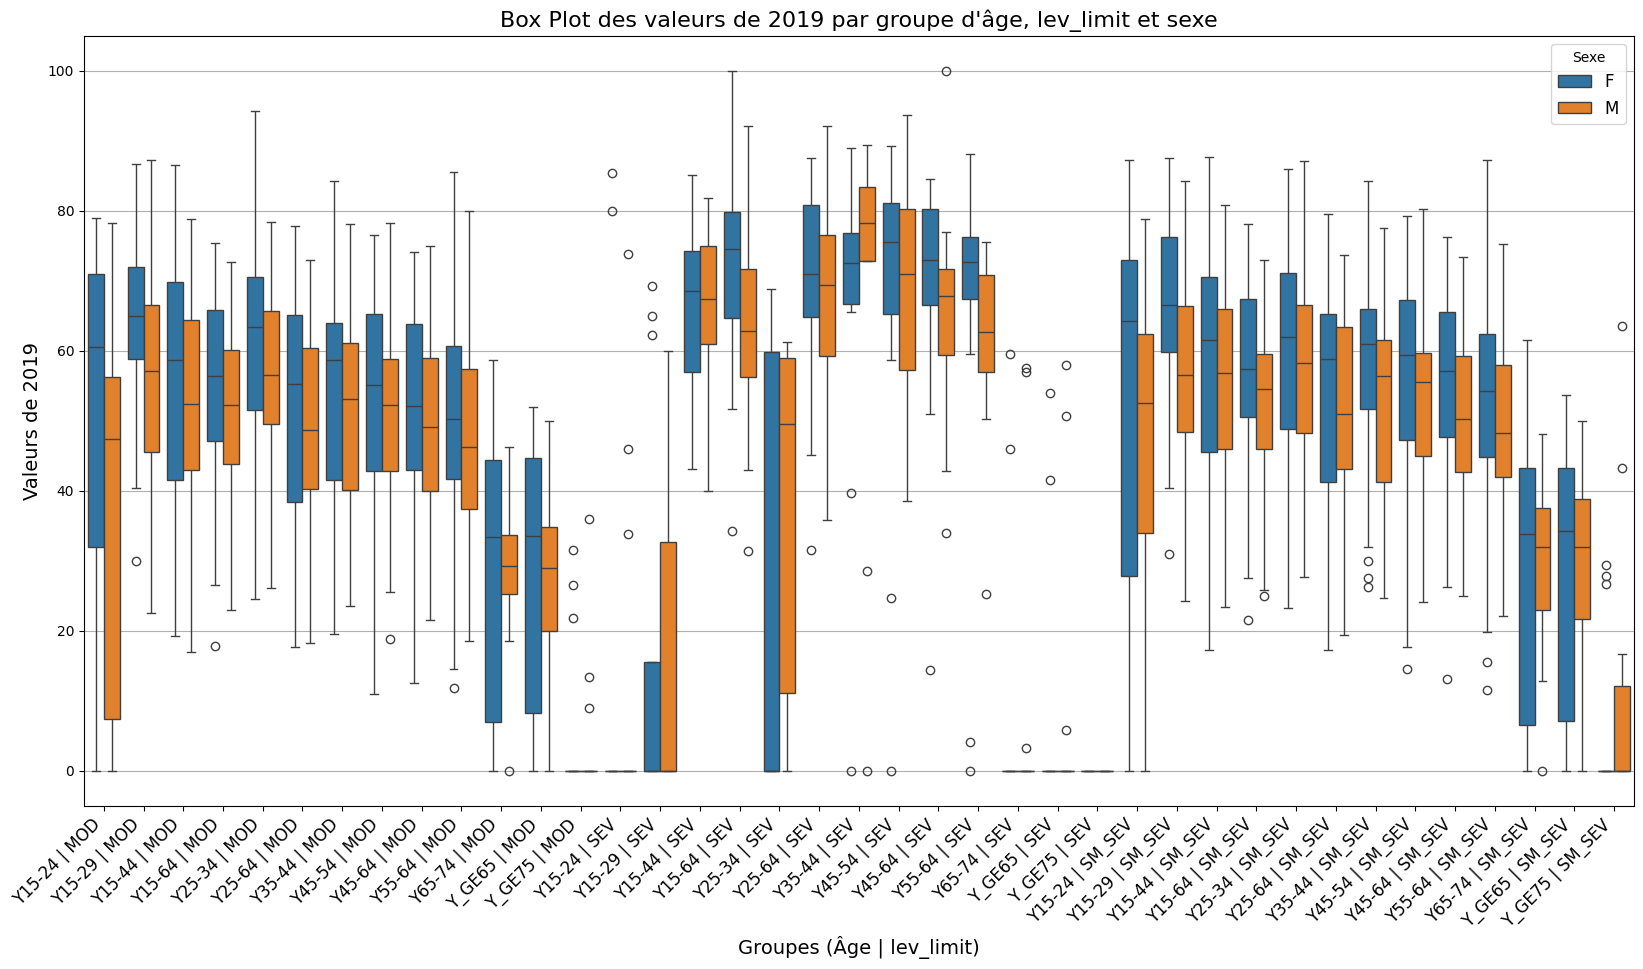

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une colonne combinée pour regrouper par 'lev_limit', 'sex' et 'age'
df_hlth_ehis_aw1d['group'] = df_hlth_ehis_aw1d['age'] + " | " + df_hlth_ehis_aw1d['lev_limit']

# Créer un box plot avec tous les groupes
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_hlth_ehis_aw1d, x='group', y='2019', hue='sex')

# Ajouter des titres et labels
plt.title("Box Plot des valeurs de 2019 par groupe d'âge, lev_limit et sexe", fontsize=16)
plt.xlabel("Groupes (Âge | lev_limit)", fontsize=14)
plt.ylabel("Valeurs de 2019", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotation des labels pour plus de lisibilité
plt.legend(title="Sexe", fontsize=12)
plt.grid(axis='y')

# Afficher le graphique
plt.show()
